# TD10: MAPK logical analysis 
- reaction system from BioModels http://biomodels.org
- CTL model-checking
- CTL model-reduction

F. Fages, 2 Feb 2017

The MAPK cascade:
![NR](NatureReviews_MolCellBiol_mapk.jpg)

![HF1996pnas](HF1996pnas_cascade.jpg)

In [1]:
load('library:biomodels/BIOMD0000000009.xml').

In [2]:
list_model.

r1a__a1*E1*KKK for KKK+E1=>E1_KKK.
r1a__d1*E1_KKK for E1_KKK=>KKK+E1.
r1b__k2*E1_KKK for E1_KKK=>E1+P_KKK.
r2a__a2*E2*P_KKK for P_KKK+E2=>E2_P_KKK.
r2a__d2*E2_P_KKK for E2_P_KKK=>P_KKK+E2.
r2b__k2*E2_P_KKK for E2_P_KKK=>E2+KKK.
r3a__a3*KK*P_KKK for KK+P_KKK=>P_KKK_KK.
r3a__d3*P_KKK_KK for P_KKK_KK=>KK+P_KKK.
r3b__k3*P_KKK_KK for P_KKK_KK=>P_KK+P_KKK.
r4a__a4*P_KK*KKPase for P_KK+KKPase=>KKPase_P_KK.
r4a__d4*KKPase_P_KK for KKPase_P_KK=>P_KK+KKPase.
r4b__k4*KKPase_P_KK for KKPase_P_KK=>KK+KKPase.
r5a__a5*P_KK*P_KKK for P_KK+P_KKK=>P_KKK_P_KK.
r5a__d5*P_KKK_P_KK for P_KKK_P_KK=>P_KK+P_KKK.
r5b__k5*P_KKK_P_KK for P_KKK_P_KK=>PP_KK+P_KKK.
r6a__a6*PP_KK*KKPase for PP_KK+KKPase=>KKPase_PP_KK.
r6a__d6*KKPase_PP_KK for KKPase_PP_KK=>PP_KK+KKPase.
r6b__k6*KKPase_PP_KK for KKPase_PP_KK=>P_KK+KKPase.
r7a__a7*K*PP_KK for K+PP_KK=>PP_KK_K.
r7a__d7*PP_KK_K for PP_KK_K=>K+PP_KK.
r7b__k7*PP_KK_K for PP_KK_K=>P_K+PP_KK.
r8a__a8*P_K*KPase for P_K+KPase=>KPase_P_K.
r8a__d8*KPase_P_K for KPase_P_K=>P_K+KP

In [3]:
generate_ctl.

reachable('E1')
reachable('E1_KKK')
reachable('E2')
reachable('E2_P_KKK')
reachable('K')
reachable('KK')
reachable('KKK')
reachable('KKPase')
reachable('KKPase_PP_KK')
reachable('KKPase_P_KK')
reachable('KPase')
reachable('KPase_PP_K')
reachable('KPase_P_K')
reachable('PP_K')
reachable('PP_KK')
reachable('PP_KK_K')
reachable('PP_KK_P_K')
reachable('P_K')
reachable('P_KK')
reachable('P_KKK')
reachable('P_KKK_KK')
reachable('P_KKK_P_KK')
reachable(steady('E1'))
reachable(steady('E1_KKK'))
reachable(steady('E2'))
reachable(steady('E2_P_KKK'))
reachable(steady('K'))
reachable(steady('KK'))
reachable(steady('KKK'))
reachable(steady('KKPase'))
reachable(steady('KKPase_PP_KK'))
reachable(steady('KKPase_P_KK'))
reachable(steady('KPase'))
reachable(steady('KPase_PP_K'))
reachable(steady('KPase_P_K'))
reachable(steady('PP_K'))
reachable(steady('PP_KK'))
reachable(steady('PP_KK_K'))
reachable(steady('PP_KK_P_K'))
reachable(steady('P_K'))
reachable(steady('P_KK'))
reachable(steady('P_KKK'))
reacha

In [4]:
check_ctl(query:checkpoint2(PP_KK,PP_K)).

checkpoint2(PP_KK,PP_K) is true


In [5]:
check_ctl(query:checkpoint2(PP_KK_KKPase,PP_K)).

checkpoint2(PP_KK_KKPase,PP_K) is false


In [6]:
check_ctl(query:checkpoint2(PP_KK_KKPase,PP_K), nusmv_counter_example:yes).

Trace:
E1	E1_KKK	E2	E2_P_KKK	K	KK	KKK	KKPase	KKPase_PP_KK	KKPase_P_KK	KPase	KPase_PP_K	KPase_P_K	PP_KK	PP_KK_K	PP_KK_P_K	P_K	P_KK	P_KKK	P_KKK_KK	P_KKK_P_KK	PP_K	PP_KK_KKPase
TRUE	FALSE	TRUE	FALSE	TRUE	TRUE	TRUE	TRUE	FALSE	FALSE	TRUE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE	FALSE

checkpoint2(PP_KK_KKPase,PP_K) is false


# Model reduction preserving CTL properties
Taking the CTL properties generated above as a specification, the model-checker can be used to determine whether some reactions can be removed with changing those CTL properties.

In [7]:
reduce_model.

removed [ (r1a__d1*'E1_KKK'for'E1_KKK'=>'KKK'+'E1'), (r2a__d2*'E2_P_KKK'for'E2_P_KKK'=>'P_KKK'+'E2'), (r3a__d3*'P_KKK_KK'for'P_KKK_KK'=>'KK'+'P_KKK'), (r4a__d4*'KKPase_P_KK'for'KKPase_P_KK'=>'P_KK'+'KKPase'), (r5a__d5*'P_KKK_P_KK'for'P_KKK_P_KK'=>'P_KK'+'P_KKK'), (r6a__d6*'KKPase_PP_KK'for'KKPase_PP_KK'=>'PP_KK'+'KKPase'), (r7a__d7*'PP_KK_K'for'PP_KK_K'=>'K'+'PP_KK'), (r8a__d8*'KPase_P_K'for'KPase_P_K'=>'P_K'+'KPase'), (r9a__d9*'PP_KK_P_K'for'PP_KK_P_K'=>'P_K'+'PP_KK'), (r10a__d10*'KPase_PP_K'for'KPase_PP_K'=>'PP_K'+'KPase')]


In [8]:
list_model.

r1a__a1*E1*KKK for KKK+E1=>E1_KKK.
r1b__k2*E1_KKK for E1_KKK=>E1+P_KKK.
r2a__a2*E2*P_KKK for P_KKK+E2=>E2_P_KKK.
r2b__k2*E2_P_KKK for E2_P_KKK=>E2+KKK.
r3a__a3*KK*P_KKK for KK+P_KKK=>P_KKK_KK.
r3b__k3*P_KKK_KK for P_KKK_KK=>P_KK+P_KKK.
r4a__a4*P_KK*KKPase for P_KK+KKPase=>KKPase_P_KK.
r4b__k4*KKPase_P_KK for KKPase_P_KK=>KK+KKPase.
r5a__a5*P_KK*P_KKK for P_KK+P_KKK=>P_KKK_P_KK.
r5b__k5*P_KKK_P_KK for P_KKK_P_KK=>PP_KK+P_KKK.
r6a__a6*PP_KK*KKPase for PP_KK+KKPase=>KKPase_PP_KK.
r6b__k6*KKPase_PP_KK for KKPase_PP_KK=>P_KK+KKPase.
r7a__a7*K*PP_KK for K+PP_KK=>PP_KK_K.
r7b__k7*PP_KK_K for PP_KK_K=>P_K+PP_KK.
r8a__a8*P_K*KPase for P_K+KPase=>KPase_P_K.
r8b__k8*KPase_P_K for KPase_P_K=>K+KPase.
r9a__a9*P_K*PP_KK for P_K+PP_KK=>PP_KK_P_K.
r9b__k9*PP_KK_P_K for PP_KK_P_K=>PP_KK+PP_K.
r10a__a10*PP_K*KPase for PP_K+KPase=>KPase_PP_K.
r10b__k10*KPase_PP_K for KPase_PP_K=>P_K+KPase.
present(E1,3.0e-5).
present(E2,0.0003).
present(KKK,0.003).
present(P_KKK,0.0).
present(KK,1.2).
present(P_KK,0.0).


# Numerical simulation
Not surprinsingly, eliminating the dephosphorylation reactions produce a stiffer response of the cascade.

In [9]:
option(time:400).

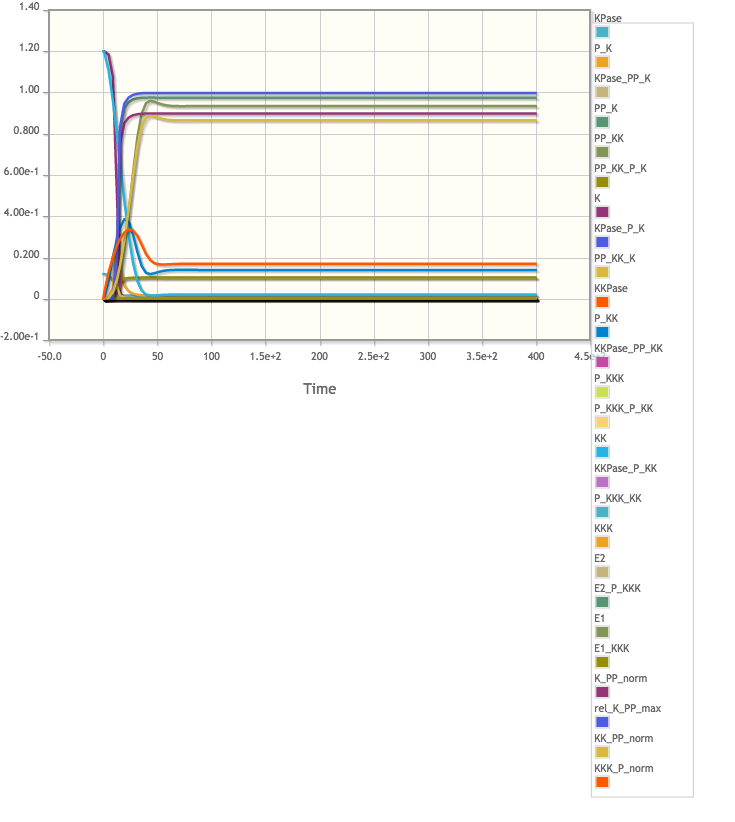

In [10]:
numerical_simulation. plot.

In [11]:
option(time:100, show: {rel_K_PP_max, KK_PP_norm, KKK_P_norm}).
numerical_simulation. plot.

In [12]:
dose_response(E1, 1e-6, 1e-4).